<a href="https://colab.research.google.com/github/Junjaee/Study/blob/main/Python_Data_Analytics_Library/03_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 참고 사이트

- http://matplotlib.org
- http://seaborn.pydata.org

### 기본 그래프

    선(line), 막대(bar), 히스토그램(histogram), 산포도(scatter), 상자(box)

### 질적 데이터

- 요약 방법 : 도표
- 정리 방법 : 도수 분포표, 분할표
- 그래프 : 막대 그래프, 원 그래프, 파이 그래프, ...

### 양적 데이터

- 요약 방법 : 수치
- 정리 방법 : 산술 평균, 중앙값, ...
- 그래프 : 히스토그램, Boxplot, Scatter plot, 시계열(선) 그래프, ...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.font_manager as fm
fm.FontProperties(fname = "맑은 고딕")
mpl.rcParams["axes.unicode_minus"] = False # 음수표시

import seaborn as sns

In [4]:
# 한글 깨짐 방지를 위한 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 설치후 런타임 다시시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [2]:
# 폰트 적용
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

### 1. 선 그래프

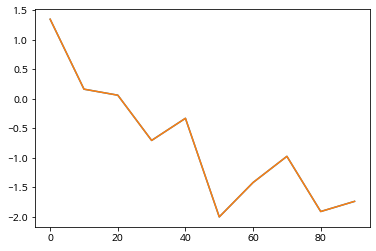

In [ ]:
s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0, 100, 10))
s
s.plot()
s.plot.line()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backe

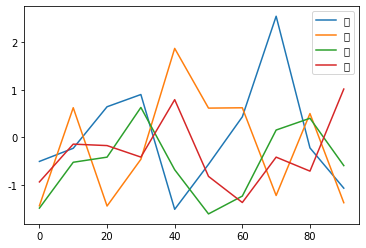

In [3]:
df1 = pd.DataFrame(np.random.randn(10, 4), columns = ["가", "나", "다", "라"],
                   index = np.arange(0, 100, 10))
df1
df1.plot()

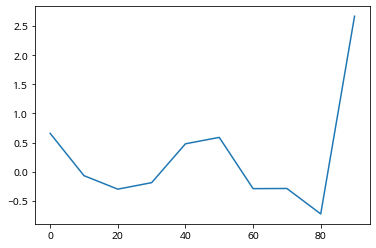

In [ ]:
df1["가"].plot()

### 2. 막대 그래프

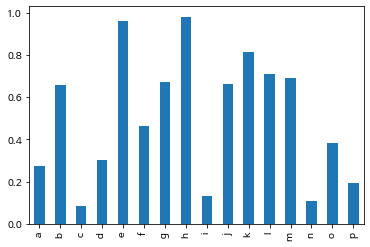

In [ ]:
s2 = pd.Series(np.random.rand(16), index = list("abcdefghijklmnop"))
s2
s2.plot(kind = "bar")
s2.plot.bar()

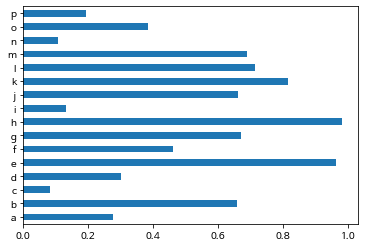

In [ ]:
# 가로 바그래프
s2.plot(kind = "barh")
s2.plot.barh()

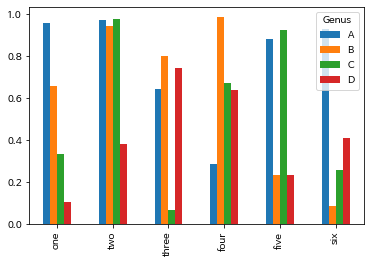

In [ ]:
df2 = pd.DataFrame(np.random.rand(6, 4),
                   index = ["one", "two", "three", "four", "five", "six"],
                   columns = pd.Index(["A", "B", "C", "D"], name = "Genus"))
df2
df2.plot(kind = "bar")

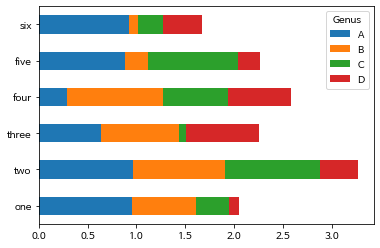

In [ ]:
df2.plot(kind = "barh", stacked = True)

### 3. histogram

- X변수가 가질 수 있는 값의 범위
- 값만 필요하고 인덱스는 필요 없다

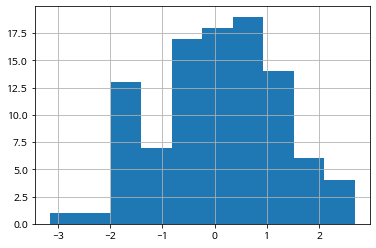

In [ ]:
s = pd.Series(np.random.normal(0, 1, size = 100))
s
s.hist()

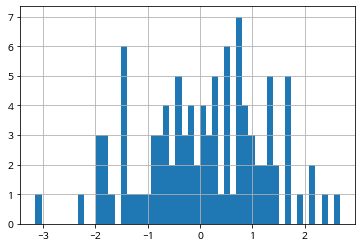

In [ ]:
s.hist(bins = 50)

### 4. 산포도(산점도, Scatter Plot)

- 두 변수의 관계를 확인 : 양, 음 

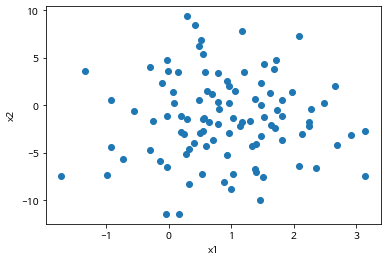

In [ ]:
x1 = np.random.normal(1, 1, size = (100, 1))
x1

x2 = np.random.normal(-2, 4, size = (100, 1))
x2

x = np.concatenate((x1, x2), axis = 1)
x

df = pd.DataFrame(x, columns = ["x1", "x2"])
df

df.plot.scatter("x1", "x2")
plt.scatter(df["x1"], df["x2"])

### 5. 상자 그래프(Boxplot)

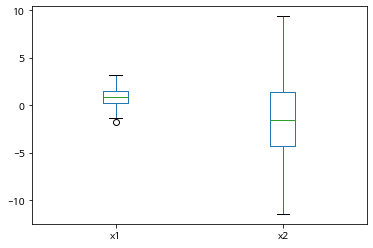

In [ ]:
df.plot.box()

### 6. 활용 예제1

- seaborn 'tips' 샘플

#### 1) 데이터 준비

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 2) total_bill에 대한 금액 분포 확인

Text(0, 0.5, 'Total Bill')

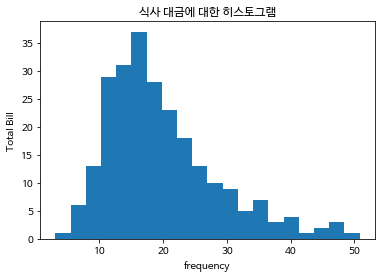

In [ ]:
# tips["total_bill"].hist()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.hist(tips["total_bill"], bins = 20)
ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

#### 3) total_bill과 tip의 관계를 알고 싶다

Text(0, 0.5, 'Tip')

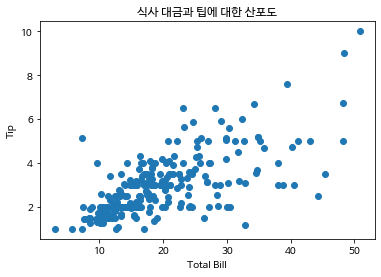

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips["total_bill"], tips["tip"])
ax.set_title("식사 대금과 팁에 대한 산포도")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

#### 4) 성별에 따른 total_bill과 tip의 관계를 알고 싶다

In [ ]:
def record_sex(sex):
  if sex == "Female":
    return 0
  else:
    return 1
  
##################################################

tips["sex_color"] = tips["sex"].apply(record_sex)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


Text(0, 0.5, 'Tip')

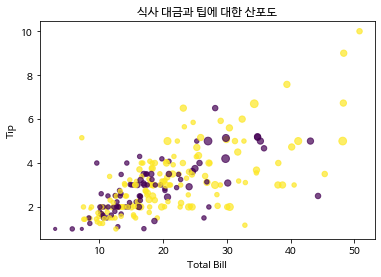

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips["total_bill"], tips["tip"], c = tips["sex_color"], alpha = 0.7,
           s = tips["size"]*10)
ax.set_title("식사 대금과 팁에 대한 산포도")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

#### 5) 성별과 팁의 관계

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Tip')

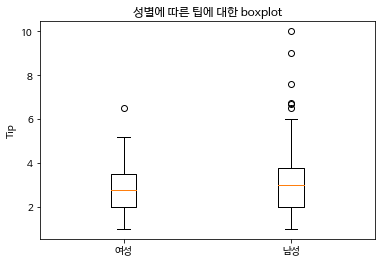

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.boxplot([tips[tips["sex"] == "Female"]["tip"], tips[tips["sex"] == "Male"]["tip"]],
           labels = ["여성", "남성"])
ax.set_title("성별에 따른 팁에 대한 boxplot")
ax.set_ylabel("Tip")

### 7. 활용 예제2

- 전국 신규 민간 아파트 분양가격 동향

#### 1) 데이터 준비

- https://data.go.kr/dataset/3035522/fileData.do


In [3]:
##### 데이터 불러오기 및 확인
from google.colab import files
myfile = files.upload()

Saving 20200331.csv to 20200331.csv


In [10]:
import io

df = pd.read_csv(io.BytesIO(myfile['20200331.csv']), encoding = 'CP949')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4590 non-null   object
 1   규모구분     4590 non-null   object
 2   연도       4590 non-null   int64 
 3   월        4590 non-null   int64 
 4   분양가격(㎡)  4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [9]:
df.head(10)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
5,인천,전체,2015,10,3163
6,인천,전용면적 60㎡이하,2015,10,3488
7,인천,전용면적 60㎡초과 85㎡이하,2015,10,3119
8,인천,전용면적 85㎡초과 102㎡이하,2015,10,3545
9,인천,전용면적 102㎡초과,2015,10,3408


In [11]:
##### column 이름을 영어로 변경하고 (city, size, year, month, price), price는 숫자로 데이터 타입 변경
apt1 = df
apt1.columns = ["city", "size", "year", "month", "price"]
apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   city    4590 non-null   object
 1   size    4590 non-null   object
 2   year    4590 non-null   int64 
 3   month   4590 non-null   int64 
 4   price   4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [ ]:
apt1["price"] = pd.to_numeric(apt1["price"].str.strip())
apt1.info()

In [19]:
%%time
#### 서울만 선택해서 "전체" size만 확인
apt_sa = apt1[(apt1["city"] == "서울") & (apt1["size"] == "전체")]

CPU times: user 1.75 ms, sys: 0 ns, total: 1.75 ms
Wall time: 1.76 ms


In [ ]:
%%time
apt1.query('(city == "서울") and (size == "전체")')

In [20]:
##### city, size컬럼 삭제하고 다중 index로(year, month) 조정, 평균 구하기
apt_sa1 = apt_sa.drop(["city", "size"], axis = 1)

In [21]:
apt_sa1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 4505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    54 non-null     int64  
 1   month   54 non-null     int64  
 2   price   54 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.7 KB


In [22]:
apt_sa1 = apt_sa1.set_index(["year", "month"])
apt_sa1.head(10)

price
year month        
2015 10     5841.0
     11     6050.0
     12     6041.0
2016 1      6108.0
     2      6111.0
     3      6173.0
     4      6241.0
     5      6264.0
     6      6208.0
     7      6254.0

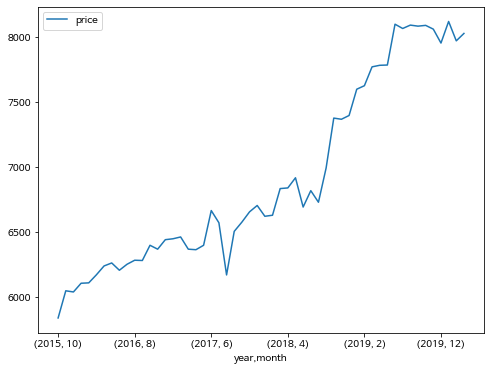

In [24]:
##### 서울지역 전체 크기별 월별 제곱미터 당 가격(천원) 변화 추이를 그래프로 출력
apt_sa1.plot(figsize = (8, 6))

### 8. seaborn

In [ ]:
tips = sns.load_dataset("tips")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(17.200000000000003, 0.5, 'Total Bill')

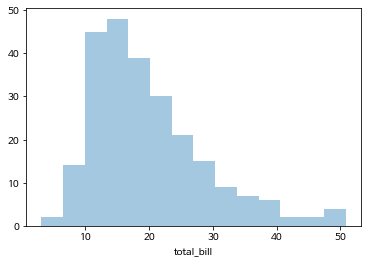

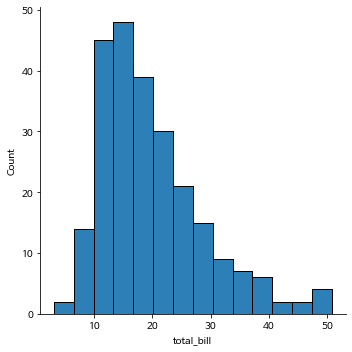

In [ ]:
##### total_bill에 대한 금액 분포 확인

sns.distplot(tips["total_bill"], kde = False)
sns.displot(tips["total_bill"])
sns.histplot(tips["total_bill"])

ax.hist(tips["total_bill"], bins = 20)
ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(17.200000000000003, 0.5, 'Total Bill')

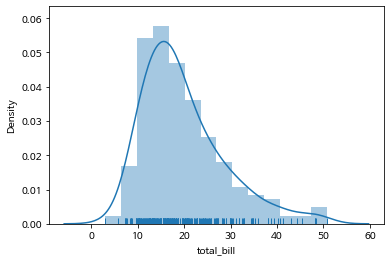

In [ ]:
sns.distplot(tips["total_bill"], rug = True)

ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


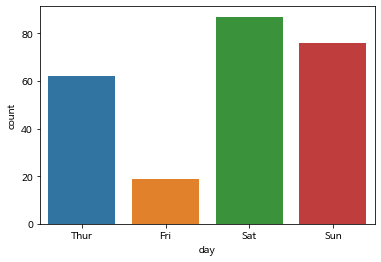

In [ ]:
##### 요일별로 인원수 파악

sns.countplot("day", data = tips)

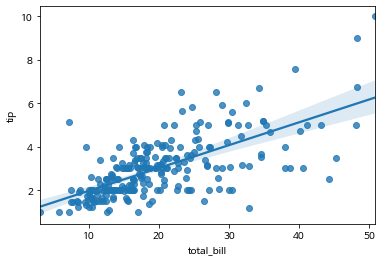

In [ ]:
sns.regplot(x = 'total_bill', y = 'tip', data = tips)

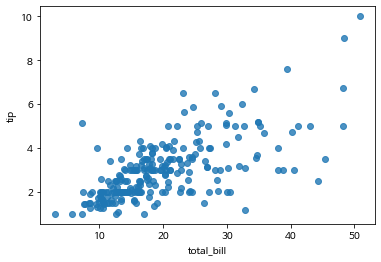

In [ ]:
sns.regplot(x = 'total_bill', y = 'tip', data = tips, fit_reg = False)

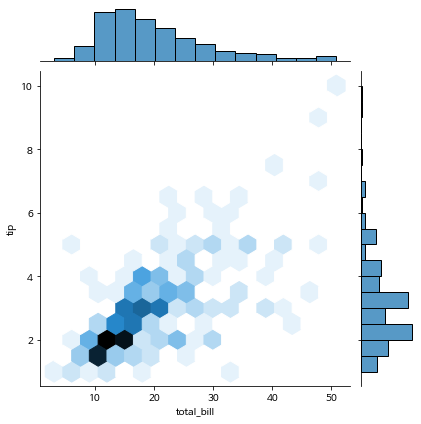

In [ ]:
sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = "hex")

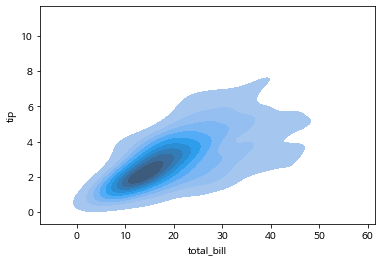

In [ ]:
sns.kdeplot(x = "total_bill", y = "tip", data = tips, shade = True)

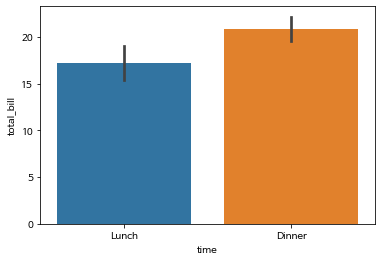

In [ ]:
sns.barplot(x = "time", y = "total_bill", data = tips)

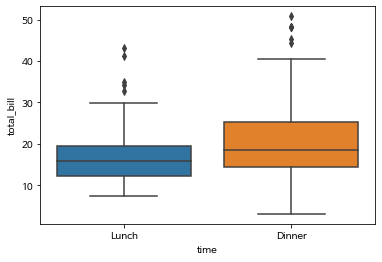

In [ ]:
sns.boxplot(x = "time", y = "total_bill", data = tips)

In [ ]:
sns.boxplot(x = "time", y = "total_bill", data = tips)

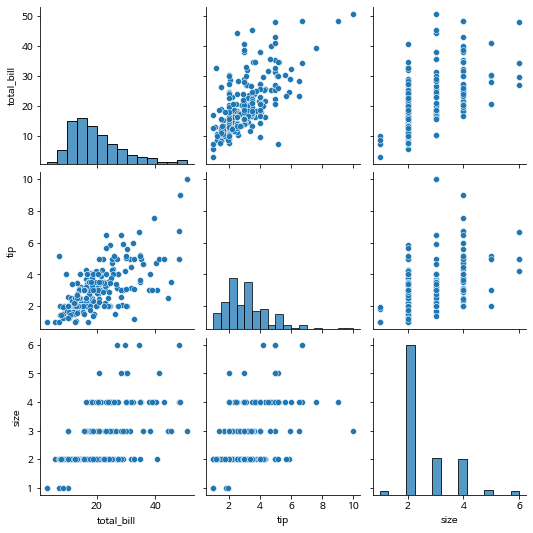

In [ ]:
sns.pairplot(tips)

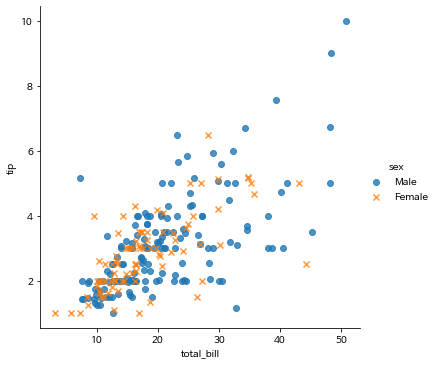

In [ ]:
##### 성별에 따른 total_bill과 tip의 관계를 알고 싶다

sns.lmplot(x = "total_bill", y = "tip", data = tips, fit_reg = False, hue = "sex",
           markers = ["o", "x"])

### 9. 활용 예제2

- 타이타닉 샘플 : https://www.kaggle.com/c/titanic

#### 1) 데이터 준비

In [26]:
##### 데이터 불러오기 및 확인
from google.colab import files
myfile = files.upload()

Saving train.csv to train.csv


In [27]:
import io

train = pd.read_csv(io.BytesIO(myfile['train.csv']), encoding = 'CP949')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
# 결측치 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 2) EDA

In [38]:
def bar_chart(feature):
  survived = train[train["Survived"] == 1][feature].value_counts()
  dead = train[train["Survived"] == 0][feature].value_counts()
  
  df = pd.DataFrame([survived, dead])
  df.index = ["Survived", "Dead"]
  df.plot(kind = "bar", stacked = True, figsize = (10, 5))
  print(survived)

female    233
male      109
Name: Sex, dtype: int64


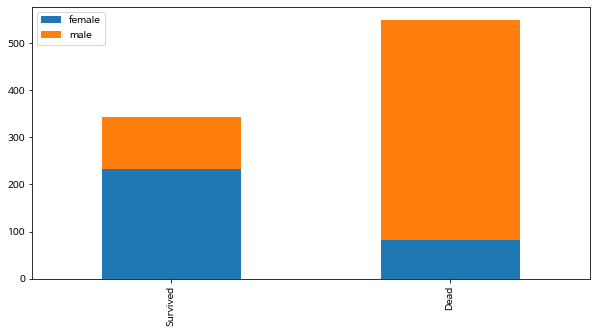

In [39]:
bar_chart("Sex")

1    136
3    119
2     87
Name: Pclass, dtype: int64


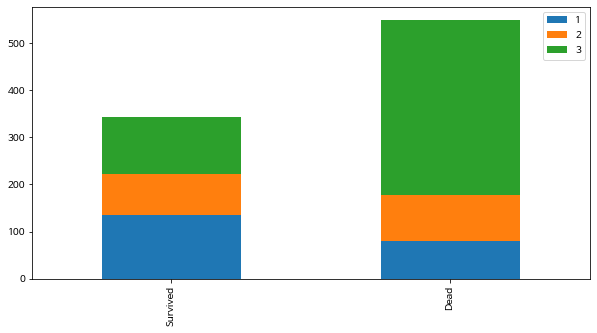

In [40]:
bar_chart("Pclass")

0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64


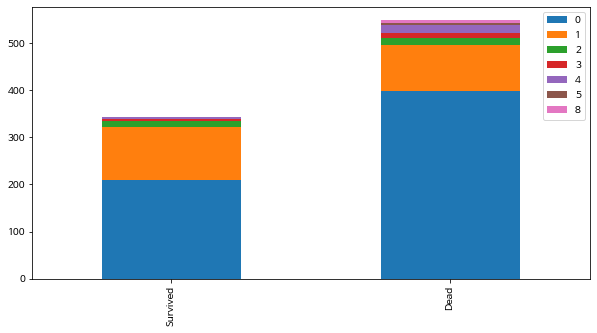

In [41]:
bar_chart("SibSp")

0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64


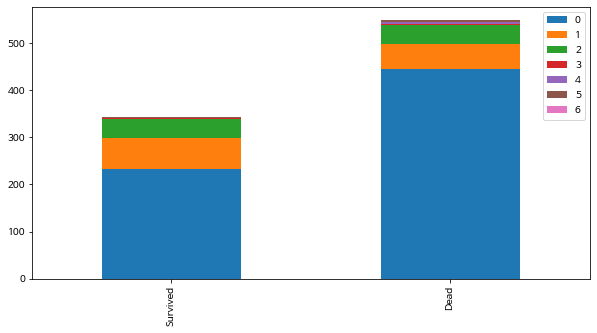

In [42]:
bar_chart("Parch")

S    217
C     93
Q     30
Name: Embarked, dtype: int64


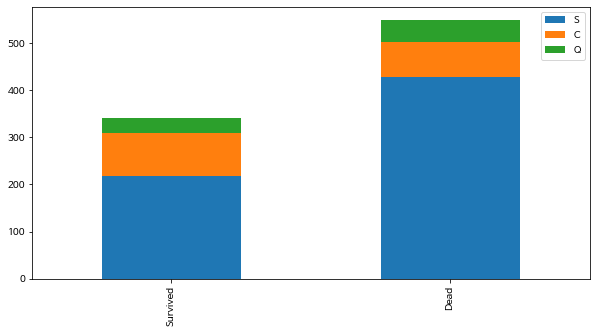

In [43]:
bar_chart("Embarked")

#### 3) Feature Engineering

In [49]:
##### Name
train["title"] = train["Name"].str.extract(' ([A-Za-z]+)\.')
train["title"].value_counts()



Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Mme           1
Lady          1
Sir           1
Ms            1
Jonkheer      1
Don           1
Capt          1
Name: title, dtype: int64

In [53]:
title_mapping = {"Mr" : 0, "Miss" : 1, "Mrs" : 2, "Master" : 3, "Dr" : 3, 
                 "Rev " : 3, "Mlle" : 3, "Major" : 3, "Col" : 3, "Countess" : 3, 
                 "Mme" : 3, "Lady" : 3, "Sir" : 3, "Ms" : 3, "Jonkheer" : 3, "Don" : 3, "Capt" : 3}

train["title"] = train["title"].map(title_mapping)
train["title"].value_counts()

0.0    517
1.0    182
2.0    125
3.0     61
Name: title, dtype: int64

1.0    127
2.0     99
0.0     81
3.0     35
Name: title, dtype: int64


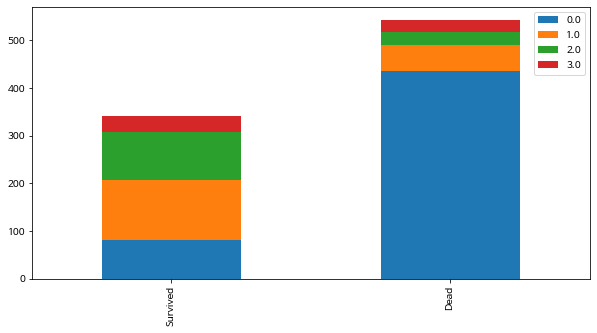

In [54]:
bar_chart("title")

In [59]:
##### Age

train["Age"].fillna(train.groupby("title")["Age"].transform("median"), inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  title        885 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [56]:
train.groupby("title")["Age"].mean()

title
0.0    32.368090
1.0    21.773973
2.0    35.898148
3.0    17.994107
Name: Age, dtype: float64

In [57]:
train.groupby("title")["Age"].median()

title
0.0    30.0
1.0    21.0
2.0    35.0
3.0     8.5
Name: Age, dtype: float64

(0.0, 20.0)

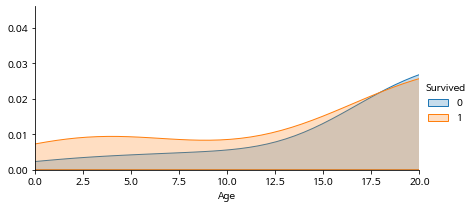

In [70]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 2)
# aspect : 폭
facet.map(sns.kdeplot, "Age", shade = True)
facet.add_legend()
facet.set(xlim = (0, train["Age"].max()))
plt.xlim(0, 20)

(30.0, 40.0)

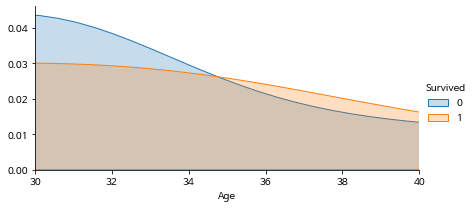

In [71]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 2)
# aspect : 폭
facet.map(sns.kdeplot, "Age", shade = True)
facet.add_legend()
facet.set(xlim = (0, train["Age"].max()))
plt.xlim(30, 40)

### 10. 지도 시각화

- pip install folium

In [72]:
import folium

In [76]:
# map = folium.Map(location = [37.497911, 127.027558], zoom_start = 15)
map = folium.Map(location = [37.497911, 127.027558], zoom_start = 15, tiles = "Stamen Toner")
map

#### 1) 미국 50개주의 실업률 표시

In [86]:
##### 데이터 불러오기 및 확인
from google.colab import files
myfile = files.upload()

Saving folium_US_Unemployment_Oct2012.csv to folium_US_Unemployment_Oct2012 (1).csv


In [88]:
from google.colab import files
myfile = files.upload()

Saving folium_us-states.json to folium_us-states (1).json


In [87]:
import io

state_unemp = pd.read_csv(io.BytesIO(myfile['folium_US_Unemployment_Oct2012.csv']), encoding = 'CP949')

state_unemp.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [114]:
import folium, html, json
state_geo = json.load(myfile['folium_us-states.json'])

AttributeError: ignored

In [112]:
map = folium.Map(location = [40, -98], zoom_start = 4)
map.choropleth(geo_data = state_geo, data = state_unemp, key_on = 'feature.id', columns = ["State", "Unemployment"], fill_color = "YlGn")

map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


ValueError: ignored

#### 2) Marking

In [116]:
map = folium.Map(location = [37.497911, 127.027558], zoom_start = 15)

marker = folium.Marker(location = [37.497911, 127.027558], icon = folium.Icon(color = "red", icon = "star"),
                       popup = "강남역 근처").add_to(map)

folium.CircleMarker(location = [37.497911, 127.027558], popup = "강남역 근처",
                    radius = 50, color = "#ffffgg", fill_color = "#fffggg").add_to(map)

map

In [125]:
from folium import IFrame

map = folium.Map(location = [37.497911, 127.027558], zoom_start = 15)
text = "많은 양의 텍스트 데이터 입력"

iframe = folium.IFrame(text, width = 700, height = 450)
pop = folium.Popup(iframe, max_width = 3000)

child = folium.Marker(location = [37.497911, 127.027558], popup = pop, icon = folium.Icon(icon_color = "green"))
map.add_child(child)
map

### 11. WordCloud

- pip install wordcloud

In [170]:
from wordcloud import WordCloud, STOPWORDS
import wordcloud

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

In [152]:
text = (open('/content/drive/My Drive/Colab Notebooks/Study/Python Data Analytics Library/data/wordcloud/constitution.txt').read())

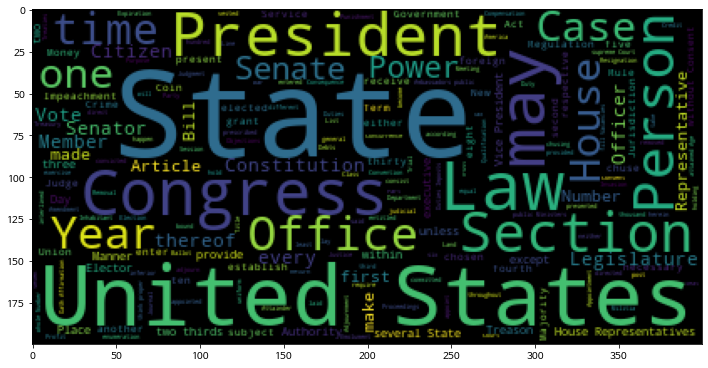

In [148]:
# text = open("")
# text = text.read()
# text

wc = WordCloud().generate(text)
dir(wc)
wc.words_

plt.figure(figsize = (12, 12))
plt.imshow(wc)

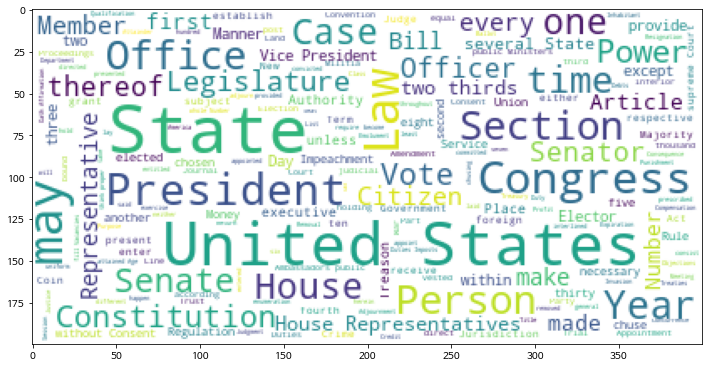

In [149]:
wc = WordCloud(max_font_size = 40, background_color = "white").generate(text)

plt.figure(figsize = (12, 12))
plt.imshow(wc)

(-0.5, 399.5, 199.5, -0.5)

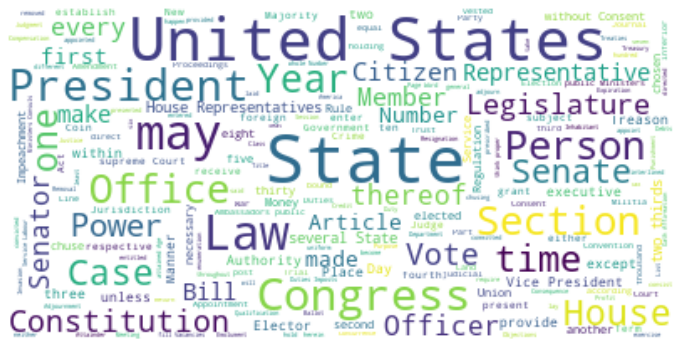

In [153]:
wc = WordCloud(max_font_size = 40, background_color = "white").generate(text)

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

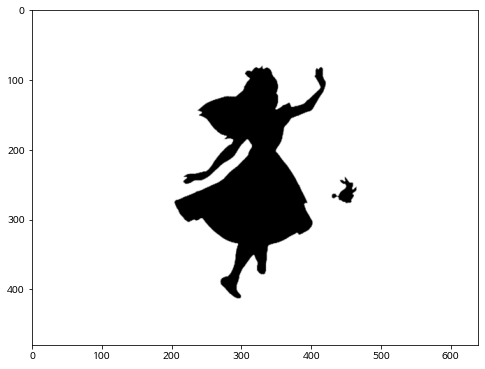

In [157]:
from PIL import Image
alice_mask = np.array(Image.open('/content/drive/My Drive/Colab Notebooks/Study/Python Data Analytics Library/data/wordcloud/alice_mask.png'))
alice_mask

plt.figure(figsize = (8, 8))
plt.imshow(alice_mask)

(-0.5, 639.5, 479.5, -0.5)

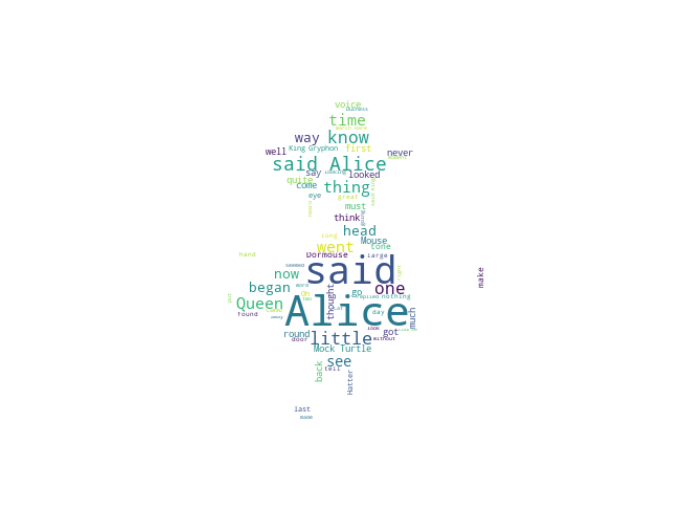

In [161]:
text = (open('/content/drive/My Drive/Colab Notebooks/Study/Python Data Analytics Library/data/wordcloud/alice.txt').read())

wc = WordCloud(max_font_size = 40, background_color = "white", mask = alice_mask).generate(text)

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

(-0.5, 639.5, 479.5, -0.5)

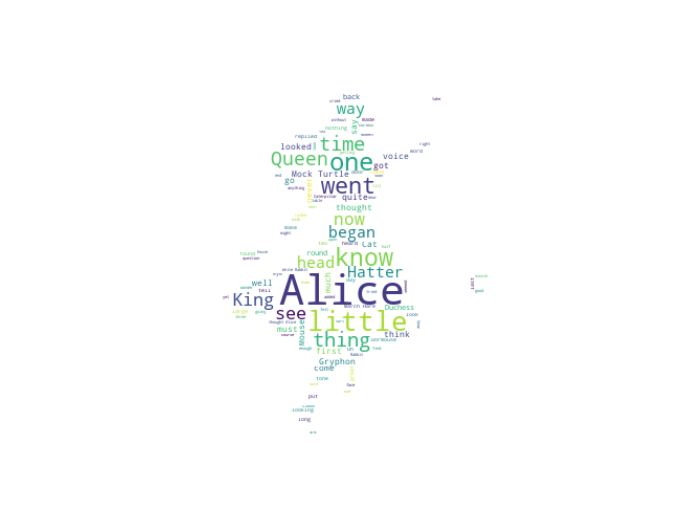

In [163]:
text = (open('/content/drive/My Drive/Colab Notebooks/Study/Python Data Analytics Library/data/wordcloud/alice.txt').read())

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(max_font_size = 40, background_color = "white", mask = alice_mask, stopwords = stopwords, max_words = 500).generate(text)

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

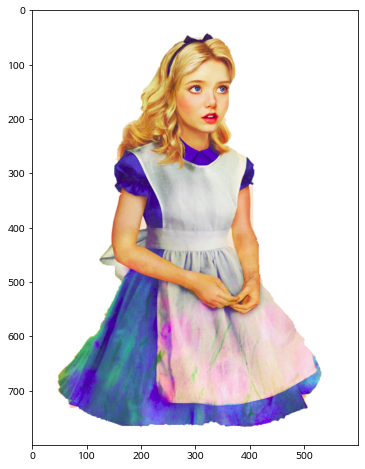

In [166]:
alice_color = np.array(Image.open('/content/drive/My Drive/Colab Notebooks/Study/Python Data Analytics Library/data/wordcloud/alice.png'))
alice_color

plt.figure(figsize = (8, 8))
plt.imshow(alice_color)

(-0.5, 599.5, 799.5, -0.5)

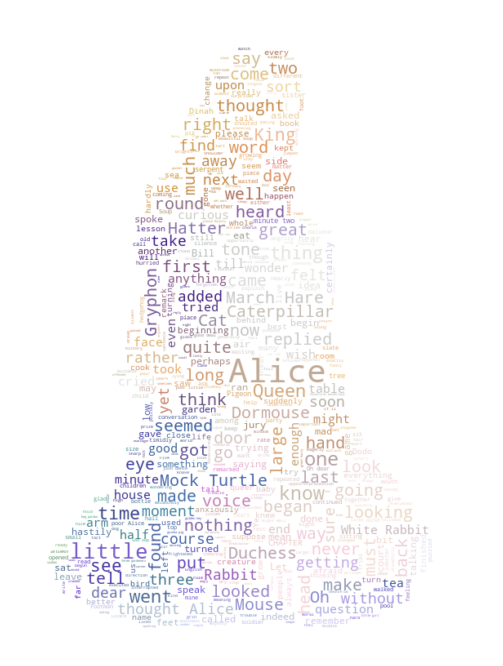

In [174]:
import wordcloud

wc = WordCloud(max_font_size = 40, background_color = "white", mask = alice_color, stopwords = stopwords, max_words = 500).generate(text)

image_colors = wordcloud.ImageColorGenerator(alice_color)

plt.figure(figsize = (12, 12))
plt.imshow(wc.recolor(color_func = image_colors), interpolation = "bilinear")
plt.axis("off")

In [ ]:
##### http://konlpy.org
##### pip install konlpy

In [ ]:
pip install konlpy

In [179]:
from konlpy.tag import Okt
from konlpy.corpus import kolaw

In [189]:
ko_text = kolaw.open("constitution.txt").read()
ko_text

# 형태소 분석
okt = Okt()
print(okt.nouns("아버지가방에들어가신다."))
print(okt.phrases("아버지가방에들어가신다."))
print(okt.normalize("아버지가방에들어가신다."))
print(okt.morphs("아버지가방에들어가신다."))
print(okt.pos("아버지가방에들어가신다."))

['아버지', '가방']
['아버지가방', '아버지', '가방']
아버지가방에들어가신다.
['아버지', '가방', '에', '들어가신다', '.']
[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb'), ('.', 'Punctuation')]
